

# Project: Investigating Factors affecting Patients keeping scheduled hospital appoints in Brazil.

# Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset describes severals details of patients in relation to scheduled hospital appointments in Brazil.
It contains 14 columns and more than 110,528 rows.
The column names are **PatientId,	AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received	No-show**


The dependent column is No-show. The rest are independent.


### Question(s) for Analysis
1. What is the distribution of patients by Gender
2. Which Gender are kept the most appointments?
3. What is the patients distribution by age?
4. Which Age group is  kept the most appointments?
5. In which neighbourhood did patients keep the most appointments? show the first  20
6. Did patients whose scheduledDay match their AppointmentDay show up more? Also when the dates did not match
7. Let us see if there is any significant difference in keeping appointments when the dates (appointment and scheduled) do no match


In [21]:
# We set up import statements for all of the packages that you
# plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [22]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling






In [23]:

df = pd.read_csv('no-show.csv')

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df.shape

(110527, 14)

Assessing data for possible anomalies

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
We have no missing values in the dataset
But there is an issue with the sheduledDay  and AppointmentDay columns. The data are in object format instead of datetime. Again the datetime format should look like this  $
yyyy-mm-dd hh:mm:ss$ so we have to remove the letters T and Z before converting to the right format

In [27]:
# After discussing the structure of the data and any problems that need to be
# removing the letters T and Z in ScheduledDay and AppointmentDay 
#we apply two string methods strip()- removing the last 'Z' and str.replace ()-replacing the middle 'T'
df['ScheduledDay']= df['ScheduledDay'].str.strip('Z').str.replace('T','  ')
df['AppointmentDay']= df['AppointmentDay'].str.strip('Z').str.replace('T','  ')

In [28]:
# checking the ScheduledDay and AppointmentDay
df[['ScheduledDay','AppointmentDay']].head()

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08,2016-04-29 00:00:00
1,2016-04-29 16:08:27,2016-04-29 00:00:00
2,2016-04-29 16:19:04,2016-04-29 00:00:00
3,2016-04-29 17:29:31,2016-04-29 00:00:00
4,2016-04-29 16:07:23,2016-04-29 00:00:00


Next we want to convert the ScheduledDay and AppointmentDay columns to approptiate datatype **datetime**. To do this we use *to_datetime()* method on the columns.

In [29]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [30]:
#Checking the dataframe for the corrections
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [31]:
#checking for duplicated data
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


There are no duplicated data

We will further check for some structural defects like the **'No-show'** cloumn, we will change the dash to underscore i.e **'No_show'**

Again we will drop the PatientId and the AppointmentID columns as they do not seem significant.

 Finally just for uniformity we convert the column titles to small cases

In [32]:
# renaming the No-show column to No_show using rename()
df.rename(columns={'No-show':'No_show'}, inplace= True)

In [33]:
#dropping the unneccessary cells
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

In [34]:
#Making all column names lowercase
df.columns = df.columns.str.lower()

In [35]:
df.head() # Checking data quality again

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
#checking for more anomalies
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The least age cannot be negative. We further probe to know if there are negative values or decimals for age, then drop them if any

In [37]:
#dropping the rows with -ve and decimal ages
df.drop(df[df['age'] <0].index, inplace= True)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 What is the distribution of patients by Gender?

In [38]:
# we group by gender and count the number,
gender_dist= df.groupby('gender')['gender'].count()
gender_dist

gender
F    71839
M    38687
Name: gender, dtype: int64

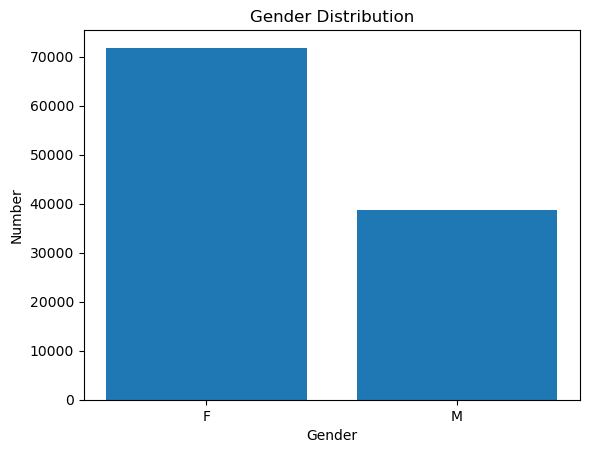

In [45]:
#then use plot the bar chart
gender_dist= df.groupby('gender')['gender'].count()
plt.bar(gender_dist.index,gender_dist);
plt.title('Gender Distribution');
plt.xlabel('Gender');
plt.ylabel('Number');



A bar chart plot of the distribution showing that females are more in the number of patients sampled


### Research Question 2: Which Gender are kept the most appointments?

In [ ]:
# Population that kept appointment
kept_aptmt = df[df['no_show']== 'No']
kept_aptmt.head()

In [ ]:
# Checking the population by gender that kept appointment
Num_Female_No= kept_aptmt[df['gender']== 'F']['gender'].count() # Number of females that kept appointment
Num_Male_No= kept_aptmt[df['gender']== 'M']['gender'].count() # Number of males that kept appointment
print('Females are likely to keep appointments.\n'+ str(Num_Female_No-Num_Male_No) +' more females kept their appointments than their male counterpart')

### To visualize the distribution we use bar Chart

In [ ]:
plt.bar(['Female','Male'],[Num_Female_No,Num_Male_No], color= ['r','y'])
plt.title('Gender Distribution based on attendance');
plt.xlabel('Gender');
plt.ylabel('Number');




Female patients are more likely to keep their appointments


### Research Question 3 :What is the patients distribution by age?

In [ ]:
df['age'].describe()

#### We divide the age among 
#### children and young adolescents (under 15 years old)
#### the working-age population (15-64 years) and
#### the elderly population (65 years and older)
source: https://ourworldindata.org/age-structure

In [ ]:
df['age_group']= pd.cut(df['age'],[0,15,64,115], labels=['children','working_age','elderly'])


In [ ]:
df['age_group'].hist(color='r',figsize= (8,8));
plt.xlabel('Age Group');
plt.ylabel('Number');
plt.title('Age Distribution');


### Research Question 4 :Which Age group is  kept the most appointments?

In [ ]:
df_No= df[df['no_show']=='No']# selecting the columns where no_show is No

df_age_No = df_No[['age_group','no_show']] #dataframe for only age_group and no_show columns
df_age_No.groupby('age_group').count()

The working age are most likely to keep appointments

In [ ]:
#plot of the distribution
df_age_No.groupby('age_group').count().plot(kind ='barh', color= 'red',figsize=(6,6));

plt.ylabel('Age Group');
plt.xlabel('Appointments kept');
plt.title('Age that will kept most appointments');

### Research Question 5: In which neighbourhood did patients keep the most appointments? show the first  20

In [ ]:
hood_No = df_No['neighbourhood'].value_counts() #Value count of neighbourhood where patients attended their appointments
hood_No.describe()

In [ ]:
hood_No.head(20)# first 20 Neighbourhoods where patients kept the most appointments

In [ ]:
#plot of first 20 neighbourhood more likely to have more patients visit
hood_No.head(20).plot(kind='bar',figsize=(18,8),color= ['r','g','y','b']);

plt.ylabel('No of appointments kept');
plt.xlabel('Neighbourhood');


### Research Question 6: Did patients whose scheduledDay match their AppointmentDay show up more? Also when the dates did not match

Here we check for dates that match in appointment and scheduledday columns and count the number of No.
Then we check for dates that do not match in the appointment and scheduledday columns and count the number of Yes.

In [ ]:
#extracting the neccessary rows and checking a few rows
df[['scheduledday','appointmentday','no_show']].head() 



In [ ]:
#converting to string and removing timestamp
df.scheduledday = df.scheduledday.astype(str).apply(lambda x:x.replace(x[11:len(x)],""))

#converting back to datetime
df.scheduledday= pd.to_datetime(df.scheduledday) 
#checking our results
df.scheduledday.head()

In [ ]:
#creating a dataframe for the selected and converted columnns
time_sch = df[['scheduledday','appointmentday','no_show']]

#checking our results
time_sch.head()

#### Comparing the time columns for matching dates
#### First we create a dataframe containing dates where appointmentday matches scheduledday
#### then count the Yes and No to find out the number that kept appointment and the number who didi not

In [ ]:
# creating a dataframe containing days where scheduled is same as appointed
time_sch_match = time_sch[time_sch['scheduledday']==time_sch['appointmentday']] 
time_sch_match.head()

In [ ]:
#counting number of patients who  kept appointments on the matched days
No_count= time_sch_match[time_sch_match['no_show']=='No']['no_show'].count()

#counting number of patients who did NOT keep appointments on the matched days

Yes_count= time_sch_match[time_sch_match['no_show']=='Yes']['no_show'].count()

print( 'The number of patients who kept the appointment when appointment date matched their \nscheduled date is '+ str(No_count))
print( 'The number of patients who did NOT keep the appointment when appointment date matched their scheduled date is '+ str(Yes_count))

#### Let us visualize the result using a bar chart

In [ ]:
plt.bar(['kept', 'Not kept'],[No_count,Yes_count], color=['r','y']);
plt.title('A plot of hospital attendance when appointment dates matches scheduled dates');
plt.xlabel('Appointments kept or Not');
plt.ylabel('Number of counts');


More people kept their appointments when the date they chose match with the appointment date

### Research Question 7:Let us see if there is any significant difference in keeping appointments when the dates (appointment and scheduled) do no match

In [ ]:
# creating a dataframe containing days where scheduled is NOT same as appointed
time_sch_mismatch = time_sch[time_sch['scheduledday']!=time_sch['appointmentday']] 
time_sch_mismatch.head()

In [ ]:
#counting number of patients who  kept appointments on the mismatched days

No_count= time_sch_mismatch[time_sch_mismatch['no_show']=='No']['no_show'].count()

#counting number of patients who did NOT keep appointments on the matched days

Yes_count= time_sch_mismatch[time_sch_mismatch['no_show']=='Yes']['no_show'].count()

print( 'The number of patients who kept the appointment when appointment date did not match their \nscheduled date is '+ str(No_count))
print( 'The number of patients who did NOT keep the appointment when appointment date did not match  their scheduled date is '+ str(Yes_count))

#### Let us visualize the result using a bar chart

In [ ]:
plt.bar(['kept', 'Not kept'],[No_count,Yes_count], color=['r','y']);
plt.title('A plot of hospital attendance when appointment dates matches scheduled dates');
plt.xlabel('Appointments kept or Not');
plt.ylabel('Number of counts');


<a id='conclusions'></a>
## Conclusions




Q1. The count shows that there are more female patients than Male patients.

Q2. From the group that kept the most appointments, Female patients kept the most appointments.

Q3. More people within the working age(15-64 years) were captured by the survey, followed by children.

Q4. More people within the working age(15-64 years) kept their hospital appointments

Q5. JARDIM CAMBURI is the neighbourhood with the highest number of patients that kept their appointments.

Q6. When the Scheduledday matched the appointmentday more patients kept their appointment

Q7 But when the Scheduledday did NOT match he appointmentday even much more patients  kept their appointments This could be because the sole right of setting the appointment day lies with the hospitals and the patients who needs relieve will do all to 

### Limitation
1. More information is needed concerning other gender categories.
2. This exploration did not explore all the given factors that were given in the dataset.
3. 






In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])